In [1]:
# import requried libraries 

import pandas as pd 
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data 

df = pd.read_csv(r"F:\Data Science\Data-Science-Salary-Project\cleaned_jobs_data.csv")
df_copy = df.copy()
df_copy

,Company Name,Job Title,Location,Job Description,Rating,Size,Industry,Sector,Founded,Ownership,Revenue,min_salary,max_salary,avg_salary,age,python,r,spark,aws,excel,genai,LLMs,sql
0,Karmaeduconsultant,Data Scientist,Karmaeduconsultant,Job Description: As a Data Scientist at our co...,4.0,1001 - 5000 Employees,Enterprise Software & Network Solutions,Finance,2006.0,Company - Private,10000+ million,4,10,7,18.0,1,0,1,0,1,0,0,1
1,AQB Solutions Pvt Ltd,Data Scientist,Remote,Must have: Minimum Experience 5+years\nPython ...,4.6,51 - 200 Employees,Enterprise Software & Network Solutions,Information Technology,2009.0,Company - Private,10000+ million,10,12,11,15.0,1,0,0,0,0,0,0,1
2,Zelton Solutions,Data Scientist,Zelton Solutions,Job Description:\nResponsibilities:\nCollabora...,4.0,1001 - 5000 Employees,Enterprise Software & Network Solutions,Management and consulting,2009.0,Company - Private,10000+ million,5,19,12,15.0,0,0,0,0,0,0,1,0
3,Global Employees,Python Data Scientist(Contract),Global Employees,Job Description\nPython Data Scientist/Analyst...,4.0,1001 - 5000 Employees,Enterprise Software & Network Solutions,Finance,2009.0,Company - Private,10000+ million,20,30,25,15.0,1,0,0,0,0,0,0,0
4,Saaki Argus & Averil Consulting,Junior Data Scientist,Chennai,About the Role:\nWe are looking for a Data Sci...,4.1,51 - 200 Employees,HR Consulting,Human resources and staffing,1998.0,Private Practice / Firm,10000+ million,3,9,6,26.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Pentair,Engineer - Data Analytics (Data Analysis and M...,Noida,Job Description:\nJob Description:\nPentair is...,3.9,10000+ Employees,Machinery Manufacturing,Manufacturing,1966.0,Company - Public,2000 - 5000 million,6,7,6,58.0,0,0,0,0,1,0,0,0
896,Nathan Research,Business Analysis/Data Science,Chennai,Representative responsibilities\nStudying and ...,4.6,1 - 50 Employees,Enterprise Software & Network Solutions,Finance,1966.0,Company - Private,100 - 500 million,3,8,5,58.0,0,0,0,0,0,0,0,0
897,Beckman Coulter Life Sciences,Data Engineer,Bengaluru,Beckman Coulter Life Sciences’ mission is to e...,3.5,1001 - 5000 Employees,Biotech & Pharmaceuticals,Pharmaceutical and biotechnology,1935.0,Subsidiary or Business Segment,2000 - 5000 million,7,9,8,89.0,0,0,0,0,1,0,0,0
898,Microsoft,Applied Scientist,Bengaluru,Do you want to be part of a team which deliver...,4.3,10000+ Employees,Computer Hardware Development,Information Technology,1975.0,Company - Public,10000+ million,4,6,5,49.0,0,0,0,1,0,0,0,0


# 1. Feature Engineering
- We have missed some of the preprecessing process, lets do here.
## Fixing column names

In [6]:
df_copy.columns

Index(['Company Name', 'Job Title', 'Location', 'Job Description', 'Rating',
       'Size', 'Industry', 'Sector', 'Founded', 'Ownership', 'Revenue',
       'min_salary', 'max_salary', 'avg_salary', 'age', 'python', 'r', 'spark',
       'aws', 'excel', 'genai', 'LLMs', 'sql'],
      dtype='object')

In [3]:
# rename few columns 
df_copy = df_copy.rename(columns={'Company Name': 'Company', 
                                  'Job Title': 'Job_title',
                                  'Job Description': 'Job_Description'})

## Creating new features

In [8]:
# function to create new features from 'Job_title'
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [9]:
# create a new feature 'Job_simp' which contains the simplefied names of the 'Job_title'
df_copy['Job_simp'] = df_copy['Job_title'].apply(title_simplifier)

In [138]:
df_copy.Job_simp.value_counts()

Job_simp
data scientist    611
na                153
mle                77
analyst            22
data engineer      13
manager            13
director           11
Name: count, dtype: int64

In [10]:
# create a new feature 'seniority' which contains the seniority information 
df_copy['seniority'] = df_copy['Job_title'].apply(seniority)

In [140]:
df_copy.seniority.value_counts()

seniority
na        695
senior    202
jr          3
Name: count, dtype: int64

## Dtypes of columns

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          900 non-null    object 
 1   Job_title        900 non-null    object 
 2   Location         900 non-null    object 
 3   Job_Description  900 non-null    object 
 4   Rating           900 non-null    float64
 5   Size             900 non-null    object 
 6   Industry         900 non-null    object 
 7   Sector           900 non-null    object 
 8   Founded          900 non-null    float64
 9   Ownership        900 non-null    object 
 10  Revenue          900 non-null    object 
 11  min_salary       900 non-null    int64  
 12  max_salary       900 non-null    int64  
 13  avg_salary       900 non-null    int64  
 14  age              900 non-null    float64
 15  python           900 non-null    int64  
 16  r                900 non-null    int64  
 17  spark           

# 2. Exploratory Data Analysis
- Lets analyse and find hidden patterns, trends within the dataset.
    - 2.1. Missing values
    - 2.2. Univariate analysis (Analyzing each features)
    - 2.3 Multivarite analysis (Relationship between different featuers)

# 2.1 Missing values

In [22]:
df_copy.isnull().sum()

Company            0
Job_title          0
Location           0
Job_Description    0
Rating             0
Size               0
Industry           0
Sector             0
Founded            0
Ownership          0
Revenue            0
min_salary         0
max_salary         0
avg_salary         0
age                0
python             0
r                  0
spark              0
aws                0
excel              0
genai              0
LLMs               0
sql                0
Job_simp           0
seniority          0
dtype: int64

<Axes: >

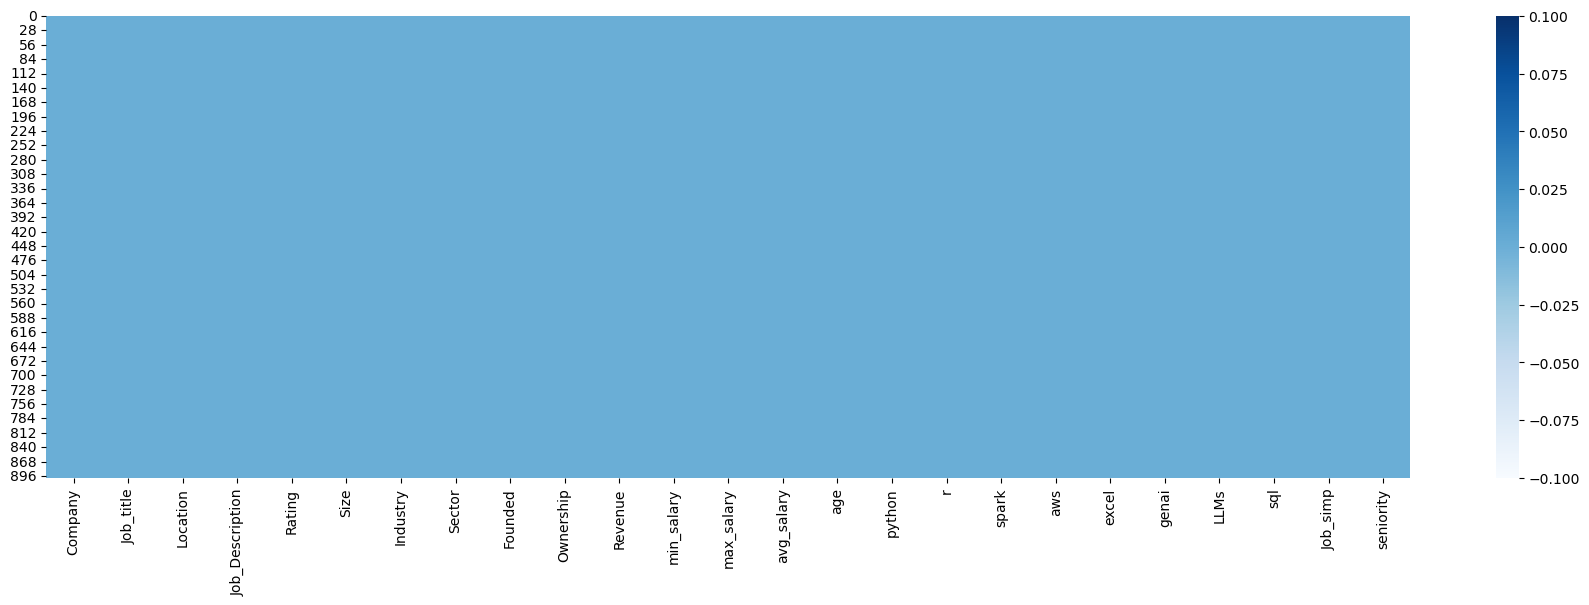

In [29]:
plt.figure(figsize=(22, 6))
sns.heatmap(df_copy.isnull(), xticklabels=True, cmap='Blues')

- We have handled the missing values in our dataset during data_cleaning itself.

# 2.2 Univariate Analysis
## Analyzing 'Location'

In [20]:
df_copy.Location.value_counts().head(10)

Location
Bengaluru    271
India         82
Chennai       79
Pune          63
Hyderābād     60
Remote        47
Mumbai        46
Gurgaon       35
Delhi         19
Noida         19
Name: count, dtype: int64

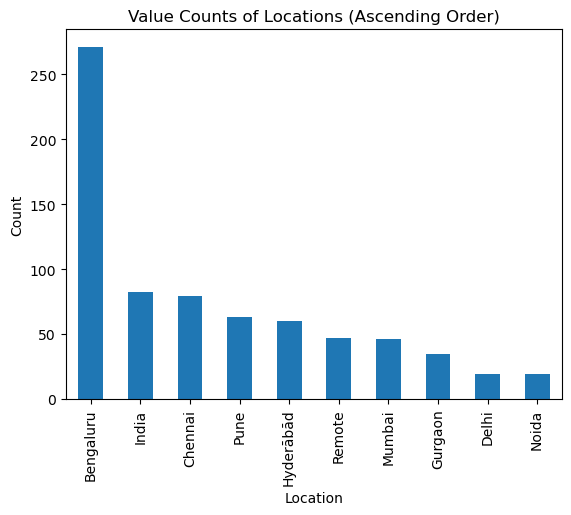

In [37]:
df_copy['Location'].value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Value Counts of Locations (Ascending Order)')
plt.show()

- The majority of job posting related to data analyst / data science are in:
     - Bengaluru,
     - Chennai,
     - Pune,
     - Hyderbad,
     - Remote

## Analyzing 'Rating'

<Axes: xlabel='Rating', ylabel='Count'>

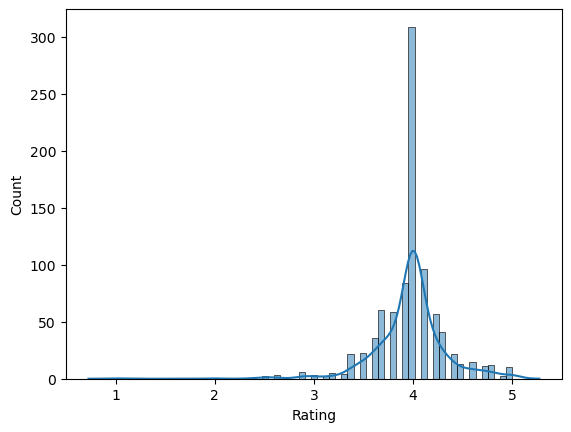

In [106]:
sns.histplot(df_copy['Rating'], kde=True, kde_kws=dict(cut=3))

- Most of the ratings are between 3.5 to 4.5.
- The most recording rating is 4.0.
- Only a few companies have rating more than 4.5.

## Analyzing 'avg_salary'

<Axes: >

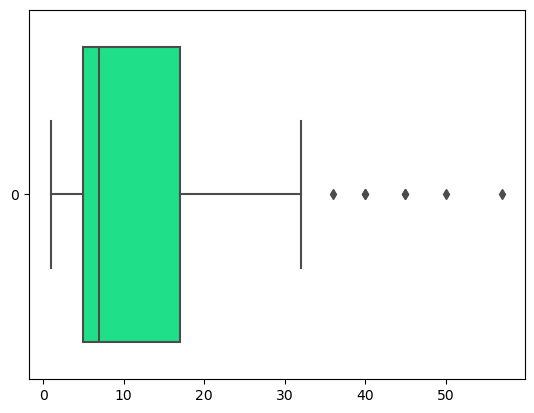

In [109]:
sns.boxplot(data=df_copy['avg_salary'], orient='h', palette='gist_rainbow')

In [38]:
df_copy.avg_salary.value_counts().head(10)

avg_salary
17    237
6     143
5     132
7      84
4      67
8      54
3      34
9      30
2      29
10     22
Name: count, dtype: int64

- The average salary is between 5 to 18 LPA, the exact amount of average salary is 17, 6 and 5 LPAs.
- The maximum salary is more than 30 LPA.
- And the column contains few outliers.

## Analyzing 'age'

<Axes: xlabel='age', ylabel='Count'>

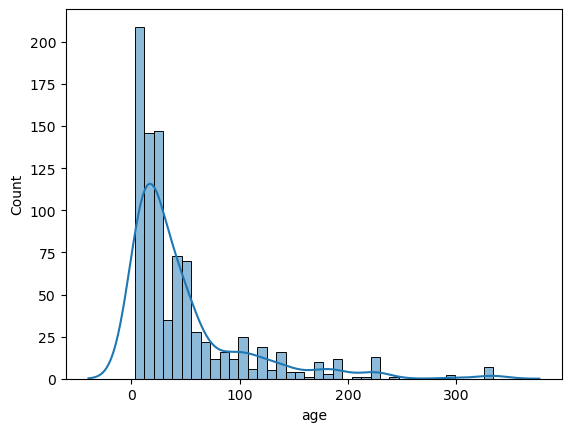

In [120]:
sns.histplot(df_copy['age'], kde=True, kde_kws=dict(cut=3))

- Looks like most of the companise age is between 0-50 years.
- Majority of the companies listed in the glassdoor website are young, most of them could be startups.
- And there are many outliers present in this feature.

## Analyzing min_salary and max_salary 

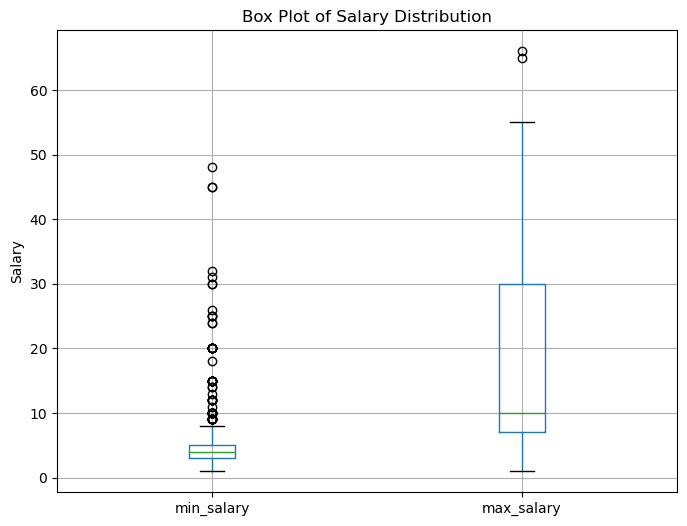

In [41]:
plt.figure(figsize=(8, 6))
df_copy[['min_salary', 'max_salary']].boxplot()
plt.title('Box Plot of Salary Distribution')
plt.ylabel('Salary')
plt.show()

From the above visualization it is clear that
 - The minimum salary range is between 2 to 5 LPA, it is less than 10 LPA and there are few outliers in the feature.
 - The maximum salary range is between 7 to 55 LPA, majority of them are between 7 to 30 LPA and the heighest salary is more than 60 LPA. 

## Analyzing 'Industry'

[Text(0, 0, 'Information Technology Support Services'),
 Text(1, 0, 'Enterprise Software & Network Solutions'),
 Text(2, 0, 'Business consulting'),
 Text(3, 0, 'Computer Hardware Development'),
 Text(4, 0, 'Internet & Web Services'),
 Text(5, 0, 'Software Development'),
 Text(6, 0, 'Biotech & Pharmaceuticals'),
 Text(7, 0, 'Banking & Lending'),
 Text(8, 0, 'HR Consulting'),
 Text(9, 0, 'Transportation Equipment Manufacturing')]

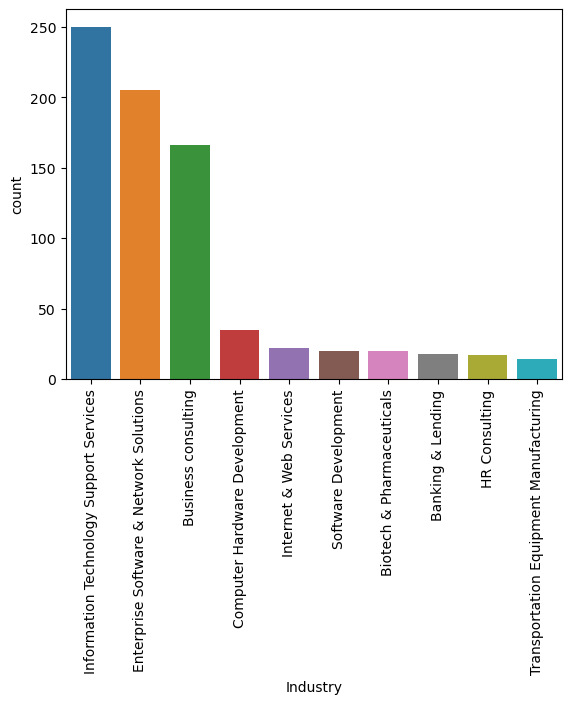

In [122]:
values = df_copy['Industry'].value_counts().nlargest(10)
plot = sns.barplot(x=values.index, y=values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

- From the above visualization we can see that majority of the companies are in the
     1. Information Technology support services
     2. Enterprise software and network solutions
     3. Business consulting 

## Analyzing 'Size'

In [153]:
df_copy.Size.value_counts()

Size
10000+ Employees          317
1001 - 5000 Employees     190
201 - 500 Employees       148
51 - 200 Employees         91
1 - 50 Employees           86
5001 - 10000 Employees     39
501 - 1000 Employees       29
Name: count, dtype: int64

- Among the companies in the job postings most of them are in size of
     1. 10000+ Employees
     2. 1001 - 5000 Employees
     3. 201 - 500 Employees
- From the above information we can conclude that in India there are many campanies in the category of mid-large. There are also companies that are in the category of small.
- Companies in India are in the size of small-mid-large. 

## Analyzing 'sector'

[Text(0, 0, 'Information Technology'),
 Text(1, 0, 'Finance'),
 Text(2, 0, 'Management and consulting'),
 Text(3, 0, 'Manufacturing'),
 Text(4, 0, 'Pharmaceutical and biotechnology'),
 Text(5, 0, 'Human resources and staffing'),
 Text(6, 0, 'Media and communication'),
 Text(7, 0, 'Retail and wholesale'),
 Text(8, 0, 'Energy, mining, utilities'),
 Text(9, 0, 'Transportation and logistics'),
 Text(10, 0, 'Education'),
 Text(11, 0, 'Telecommunications'),
 Text(12, 0, 'Healthcare'),
 Text(13, 0, 'Construction, repair and maintenance'),
 Text(14, 0, 'Real estate'),
 Text(15, 0, 'Aerospace and defence'),
 Text(16, 0, 'Insurance'),
 Text(17, 0, 'Government and public administration'),
 Text(18, 0, 'Arts, entertainment and recreation')]

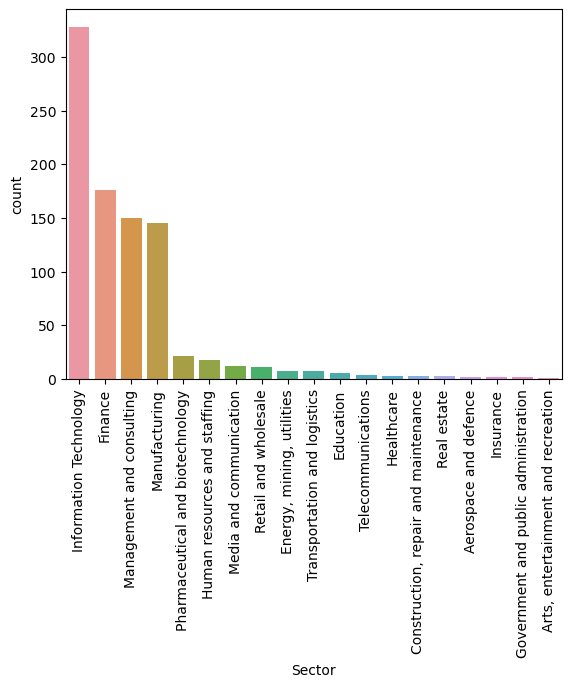

In [160]:
sec_values = df_copy.Sector.value_counts()
plot = sns.barplot(x=sec_values.index, y=sec_values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

- From the above analysis it is clear that most of the companies in the job postings are in the followings sectors:
    1. IT (Information Technology)
    2. Finance
    3. Management and consulting
    4. Manufacturing

## Analyzing Founded

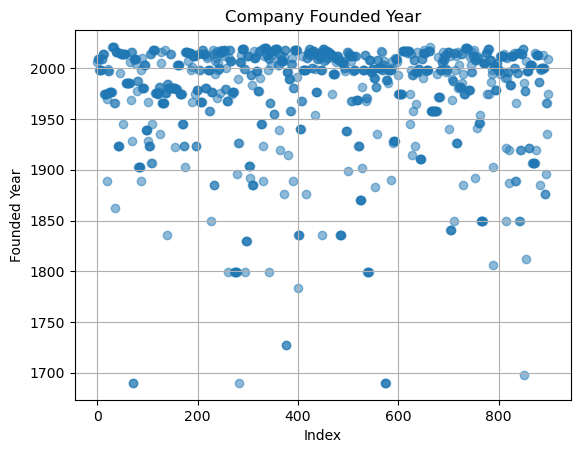

In [167]:
plt.scatter(df_copy.index, df_copy['Founded'], alpha=0.5)
plt.title('Company Founded Year')
plt.xlabel('Index')
plt.ylabel('Founded Year')
plt.grid(True)
plt.show()

In [169]:
df_copy.Founded.describe()

count     900.000000
mean     1976.741111
std        55.396063
min      1690.000000
25%      1969.000000
50%      1998.000000
75%      2012.000000
max      2021.000000
Name: Founded, dtype: float64

### Oldest Companies

In [181]:
df_copy.loc[df_copy['Founded'] == 1690, 'Company']

71                    Barclays
72     SatSure Analytics India
283                   Barclays
573                   Barclays
574           Just Compile LLP
575                   Fitfyles
Name: Company, dtype: object

### Youngest Companies

In [182]:
df_copy.loc[df_copy['Founded'] == 2021, 'Company']

30                        Calyx
31         UMENIT SOLUTIONS LLP
32     Magna International Inc.
33           Kainskep Solutions
664               ChiSquarelabs
Name: Company, dtype: object

- From visualizing the 'Founded' column it is clear that most of the companies are founded after 1950s.
- Majority of the companies are founded betwwen 1970s to 2010s.
- The oldest company was founded in 1690.
- The youngest company was founded in 2021.
- The average founded year is 1976. 

## Analyzing 'Ownership'

[Text(0, 0, 'Company - Private'),
 Text(1, 0, 'Company - Public'),
 Text(2, 0, 'Subsidiary or Business Segment'),
 Text(3, 0, 'Private Practice / Firm'),
 Text(4, 0, 'Self-employed'),
 Text(5, 0, 'Government'),
 Text(6, 0, 'College / University')]

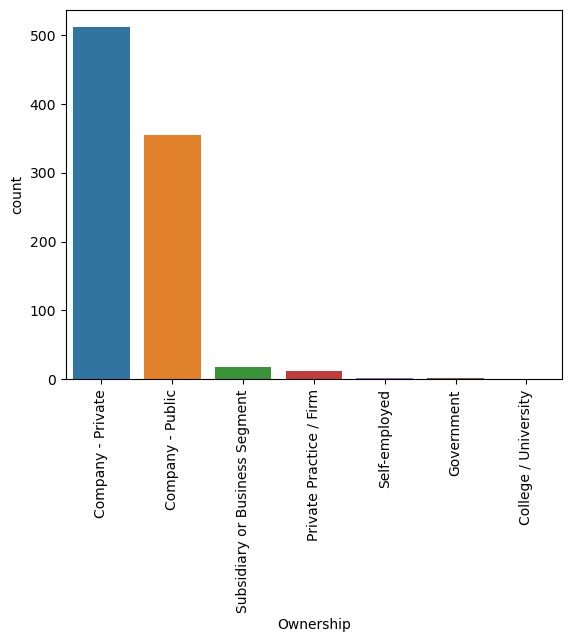

In [186]:
owner_values = df_copy.Ownership.value_counts()
plot = sns.barplot(data=df_copy, x=owner_values.index, y=owner_values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

- From the above analysis it is clear that compaines in India are either Private or Public.
- Only a few falls under other categories.

## Analyzing 'Revenue'

In [187]:
df_copy.Revenue.value_counts()

Revenue
10000+ million           549
2000 - 5000 million      169
100 - 500 million        107
5 - 25 million            21
25 - 50 million           18
5000 - 10000 million      17
1 - 5 million             14
500 - 1000 million         5
Name: count, dtype: int64

- Looks like most of the company's revenue falls under '10000+ million' and '2000-5000 million', '100-500' millions
- If we observe carefully the size of the companies are small, mid and large & now if we compare the size with revenue, we can conclude that
     1. small size companies falls under 100-500 million.
     2. mis size companies falls under 2000-5000 million.
     3. large size companies falls under 10000+ million.

## Analyzing 'python', 'sql', 'r', 'spark', 'aws', 'excel', 'genai', 'LLMs'

## 'python' 

In [149]:
df_copy.python.value_counts()

python
0    695
1    205
Name: count, dtype: int64

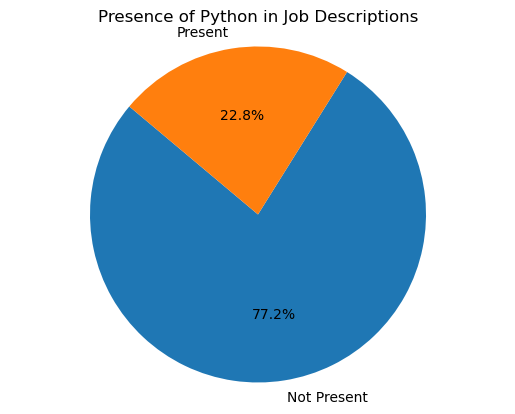

In [48]:
python_counts = df_copy['python'].value_counts()

# Plot the counts using a pie chart
plt.pie(python_counts, labels=['Not Present', 'Present'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Presence of Python in Job Descriptions')
plt.show()

- Among all the job postings only 22.8% of them has the word 'python' present in its 'Job_Description' column. Its an interesting fact as python is the primary tool used by data scientists.

## 'sql' 

<Axes: xlabel='sql', ylabel='count'>

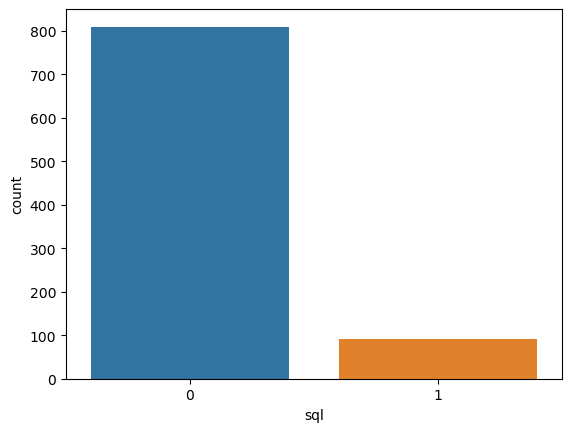

In [121]:
sns.countplot(x='sql', data=df_copy)

## 'r'

In [123]:
df_copy.r.value_counts()

r
0    899
1      1
Name: count, dtype: int64

<BarContainer object of 2 artists>

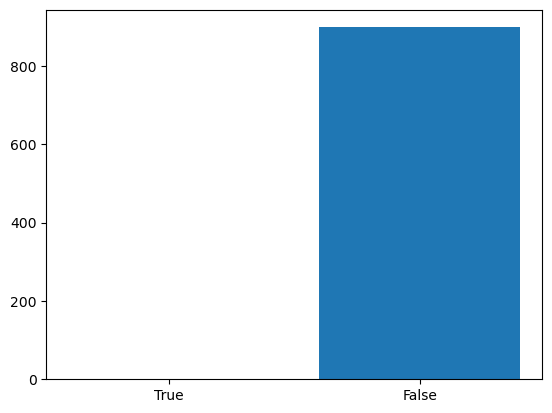

In [143]:
true_counts = df_copy['r'].value_counts()[1]
false_counts = df_copy['r'].value_counts()[0]

# Create a bar chart
plt.bar(['True', 'False'], [true_counts, false_counts])

## 'spark'

In [126]:
df_copy.spark.value_counts()

spark
0    847
1     53
Name: count, dtype: int64

<Axes: xlabel='spark', ylabel='count'>

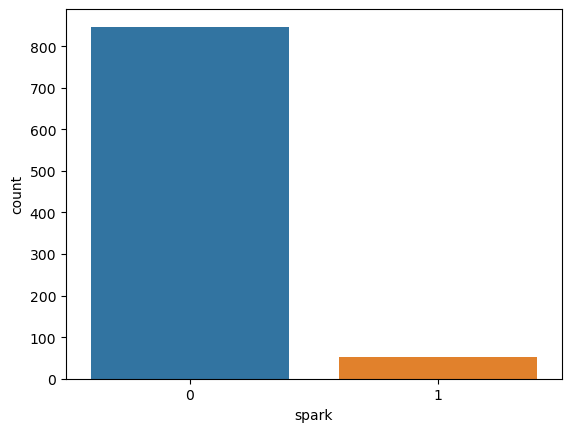

In [144]:
sns.countplot(data=df_copy, x='spark')

## 'aws'

In [127]:
df_copy.aws.value_counts()

aws
0    844
1     56
Name: count, dtype: int64

<Axes: xlabel='aws', ylabel='count'>

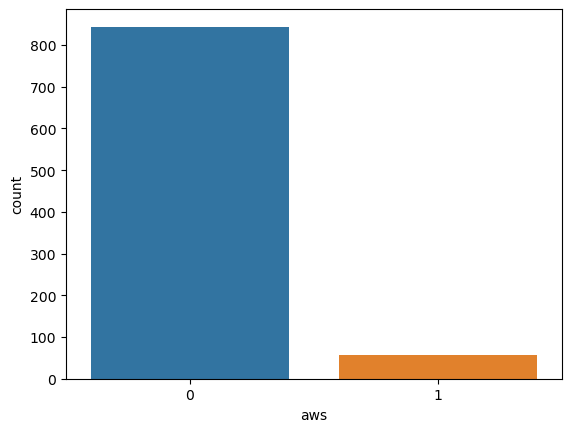

In [145]:
sns.countplot(data=df_copy, x='aws')

## 'excel'

In [128]:
df_copy.excel.value_counts()

excel
0    812
1     88
Name: count, dtype: int64

<Axes: xlabel='excel', ylabel='count'>

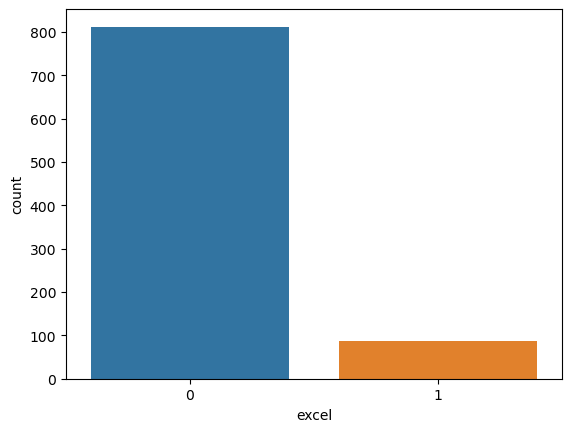

In [146]:
sns.countplot(data=df_copy, x='excel')

## 'genai'

In [130]:
df_copy.genai.value_counts()

genai
0    891
1      9
Name: count, dtype: int64

<Axes: xlabel='genai', ylabel='count'>

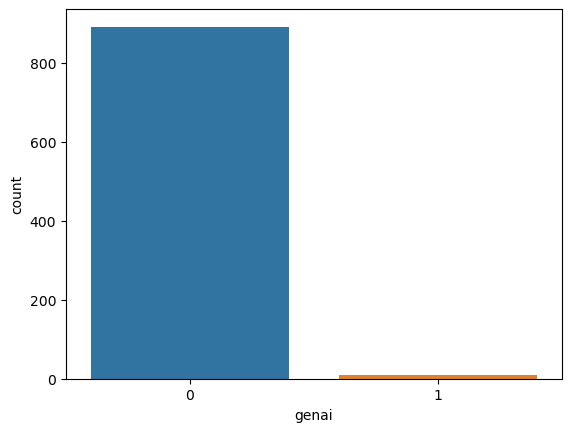

In [147]:
sns.countplot(data=df_copy, x='genai')

## 'LLMs'

In [131]:
df_copy.LLMs.value_counts()

LLMs
0    851
1     49
Name: count, dtype: int64

<Axes: xlabel='LLMs', ylabel='count'>

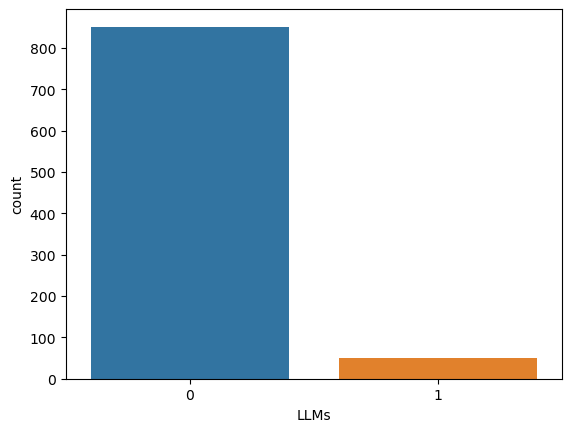

In [148]:
sns.countplot(data=df_copy, x='LLMs')

Observations:
  1. Among all the tools only python, excel is mostly present in the job_description column. Therefore python, excel are the most demanded and requrirement tool for a data scientist.
  2. Suprisingly r studio or r programming language is not required for a data scientist in India it seems like.
  3. In terms of cloud tools and data preprocessing tools aws and spark are for a data scientist.
  4. Considering the trend in AI, LLMs and working with LLMs will have a huge advantage for a data scientist.

In [150]:
# since 'r' column doesn't have any useful information we can just remove it
df_copy.drop('r', axis=1, inplace=True)

# 2.3 Bivariate/Multivariate Analysis
## Correlation heatmap

<Axes: >

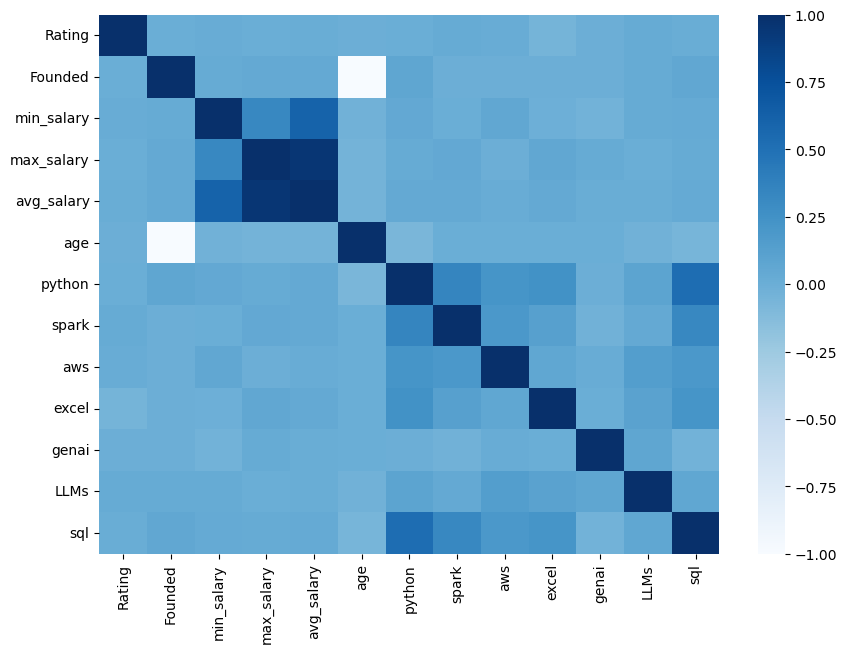

In [188]:
num_col = df_copy.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 7))
sns.heatmap(df_copy[num_col].corr(), cmap='Blues')

- From the above visualization it is clear that there is no correlation between any features in our dataset.
- Its an interesting observation as most of the numerical features will some how be correlated with other numerical features.

## Relation between 'min_salary', 'max_salary' and 'avg_salary'

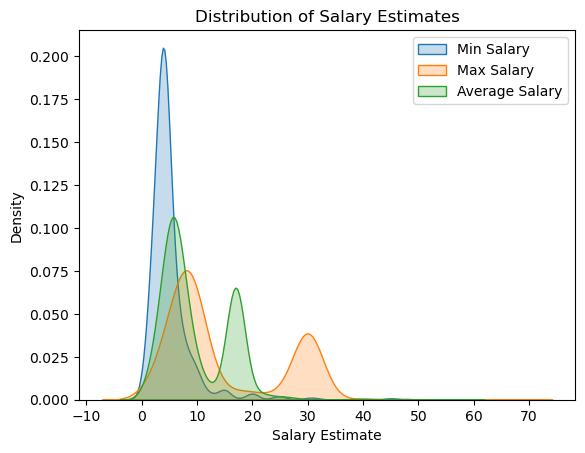

In [189]:
sns.kdeplot(data=df_copy['min_salary'], label='Min Salary', shade=True, y='count')
sns.kdeplot(data=df_copy['max_salary'], label='Max Salary', shade=True)
sns.kdeplot(data=df_copy['avg_salary'], label='Average Salary', shade=True)

# Add labels and title
plt.xlabel('Salary Estimate')
plt.ylabel('Density')
plt.title('Distribution of Salary Estimates')
plt.legend()

# Show plot
plt.show()

- The above visualization helps us to understand the distribution of min_salary, max_salary and avg_salary.
- We can compare the three columns and understand the range of mininum, maximum and average salary.

## Job_simp and avg_salary

In [193]:
pd.pivot_table(df_copy, index='Job_simp', values='avg_salary')

,avg_salary
Job_simp,
analyst,5.909091
data engineer,9.615385
data scientist,9.831424
director,6.454545
manager,10.307692
mle,9.688312
na,10.202614


- We can see that the average salary earned by a
    - Data analyst is 6 LPA
    - Data Scientist is 10 LPA
    - Data engineer is 10 LPA
    - Machine Learning Engineer is 10 LPA  

In [194]:
pd.pivot_table(df_copy, index=['Job_simp', 'seniority'], values='avg_salary')

avg_salary
Job_simp       seniority            
analyst        na           5.812500
               senior       6.166667
data engineer  na          10.000000
               senior       5.000000
data scientist jr          10.000000
               na           9.634312
               senior      10.355422
director       na           6.454545
manager        na          10.916667
               senior       3.000000
mle            na           9.333333
               senior      14.800000
na             jr           5.000000
               na           9.930233
               senior      11.956522

## Ratings and the respective Company names & Industry

### Company names and its industry where the rating >= 4.0 & rating < 4.5

In [222]:
# rating more than or equal to 4.0 and less than 4.5
high_ratings = df_copy[(df_copy['Rating'] >= 4.0) & (df_copy['Rating'] < 4.5)]

high_company = high_ratings['Company']
high_industry = high_ratings['Industry']

In [218]:
len(high_ratings)

525

- We can see that there are more than 500 companies with the rating of 4.0 and less than 4.5
- Some of the company names and its industry are given below.

In [241]:
for company, industry in zip(high_company[:10], high_industry[:10]):
    print(f"Company:  {company},   Industry:  {industry}")

Company:  Karmaeduconsultant,   Industry:  Enterprise Software & Network Solutions
Company:  Zelton Solutions,   Industry:  Enterprise Software & Network Solutions
Company:  Global Employees,   Industry:  Enterprise Software & Network Solutions
Company:  Saaki Argus & Averil Consulting,   Industry:  HR Consulting
Company:  Gururo,   Industry:  Information Technology Support Services
Company:  Cravita Technologies India,   Industry:  Information Technology Support Services
Company:  RapidBrains,   Industry:  Business consulting
Company:  Primacial HR Services,   Industry:  Information Technology Support Services
Company:  SNP Technologies,   Industry:  Information Technology Support Services
Company:  HighBrow Technology,   Industry:  Enterprise Software & Network Solutions


### Company names and its industry where the rating > 4.5

In [226]:
# rating more than 4.5
top_ratings = df_copy[df_copy['Rating'] > 4.5]

top_company = top_ratings['Company']
top_industry = top_ratings['Industry']

In [216]:
len(top_ratings)

50

- There are totally 50 different companies with rating more than 4.5
- The company names and its respective industry are give below.

In [240]:
for company, industy in zip(top_company[:15], top_industry[:15]):
    print("Company: ", company, "     Industry: ", industry)

Company:  AQB Solutions Pvt Ltd      Industry:  Business consulting
Company:  Codepan GmbH      Industry:  Business consulting
Company:  Affine      Industry:  Business consulting
Company:  Agnik      Industry:  Business consulting
Company:  Kavayah Solutions      Industry:  Business consulting
Company:  InitiateFirst.      Industry:  Business consulting
Company:  Enlyft      Industry:  Business consulting
Company:  RARR Technologies Pvt. Ltd.      Industry:  Business consulting
Company:  A5 Labs      Industry:  Business consulting
Company:  Aurigo      Industry:  Business consulting
Company:  WSD Consultant      Industry:  Business consulting
Company:  Recruitment Smart      Industry:  Business consulting
Company:  GeakMinds      Industry:  Business consulting
Company:  Innvocon      Industry:  Business consulting
Company:  Euphoric Thought Technologies Pvt Ltd      Industry:  Business consulting


## Company and lowest min_salary

In [234]:
low_salary = df_copy.sort_values(by = 'min_salary')

### Company names and its industry which has the lowest min_salary

In [243]:
low_company = low_salary['Company']
low_industry = low_salary['Industry']
salary_low = low_salary['min_salary']

- The company names and its industry which has the lowest min_salary are given below.

In [245]:
for company, industry, salary in zip(low_company[:15], low_industry[:15], salary_low[:15]):
    print(f"Company:  {company},     Industry:  {industry},     Salary:  {salary}")

Company:  Kotak Mahindra,     Industry:  Banking & Lending,     Salary:  1
Company:  UPS India,     Industry:  Shipping & Trucking,     Salary:  1
Company:  Mastercard,     Industry:  Financial Transaction Processing,     Salary:  1
Company:  Saaki Argus & Averil Consulting,     Industry:  HR Consulting,     Salary:  1
Company:  Saaki Argus & Averil Consulting,     Industry:  HR Consulting,     Salary:  1
Company:  Standard Chartered,     Industry:  Banking & Lending,     Salary:  1
Company:  Tesco,     Industry:  Grocery Stores,     Salary:  1
Company:  Hewlett Packard,     Industry:  Computer Hardware Development,     Salary:  1
Company:  Tesco,     Industry:  Grocery Stores,     Salary:  1
Company:  London Stock Exchange Group,     Industry:  Stock Exchanges,     Salary:  1
Company:  Tesco,     Industry:  Grocery Stores,     Salary:  1
Company:  Qualcomm,     Industry:  Computer Hardware Development,     Salary:  1
Company:  Success Placement,     Industry:  Information Technology S

## Age and avg_salary
- Lets find the relationship between the oldest company and its respective average salary.

In [246]:
df_copy['age'].max()

334.0

In [248]:
old_age = df_copy.sort_values(by='age', ascending=False)
old_age.age.head(10)

71     334.0
72     334.0
574    334.0
575    334.0
283    334.0
573    334.0
851    326.0
376    297.0
377    297.0
400    240.0
Name: age, dtype: float64

In [250]:
old_company = old_age['Company']
old_avg_salary = old_age['avg_salary']
age_old = old_age['age']

for company, age, salary in zip(old_company[:20], age_old[:20], old_avg_salary[:20]):
    print(f"Company:  {company},    age:  {age},   average_salary:  {salary}")

Company:  Barclays,    age:  334.0,   average_salary:  8
Company:  SatSure Analytics India,    age:  334.0,   average_salary:  17
Company:  Just Compile LLP,    age:  334.0,   average_salary:  17
Company:  Fitfyles,    age:  334.0,   average_salary:  17
Company:  Barclays,    age:  334.0,   average_salary:  8
Company:  Barclays,    age:  334.0,   average_salary:  7
Company:  London Stock Exchange Group,    age:  326.0,   average_salary:  3
Company:  NatWest Digital X,    age:  297.0,   average_salary:  8
Company:  Rapsys Technologies,    age:  297.0,   average_salary:  17
Company:  BNY Mellon,    age:  240.0,   average_salary:  8
Company:  Token Metrics,    age:  225.0,   average_salary:  17
Company:  JPMorgan Chase & Co,    age:  225.0,   average_salary:  5
Company:  JPMorgan Chase & Co,    age:  225.0,   average_salary:  5
Company:  JPMorgan Chase & Co,    age:  225.0,   average_salary:  2
Company:  Analytic Square,    age:  225.0,   average_salary:  3
Company:  Datinfi Private Limit

- We can see the oldest company names and its average salary, it looks like there is no relationship between the age of the company and the average salary provided. 

# Revenue and salary provided
- Lets find out the relationship between Revenue of the companies and the salary they provide.

In [281]:
pd.pivot_table(df_copy, index=['Revenue'], values=['min_salary', 'max_salary', 'avg_salary'])


,avg_salary,max_salary,min_salary
Revenue,,,
1 - 5 million,9.000000,11.000000,7.285714
100 - 500 million,9.457944,14.242991,5.056075
10000+ million,10.211293,15.673953,5.034608
2000 - 5000 million,9.668639,14.431953,5.230769
25 - 50 million,5.555556,7.555556,3.944444
5 - 25 million,7.666667,9.238095,6.666667
500 - 1000 million,5.800000,7.000000,5.400000
5000 - 10000 million,6.235294,8.235294,4.823529


- We can see the revenue and its respective average values of 'avg_salary', 'max_salary' and 'min_salary'.
- From observing the above pivot table we could see there is not much relationship between revenue and salary but as the revenue increases, the max_salary is also increases. 

## Word cloud

In [4]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

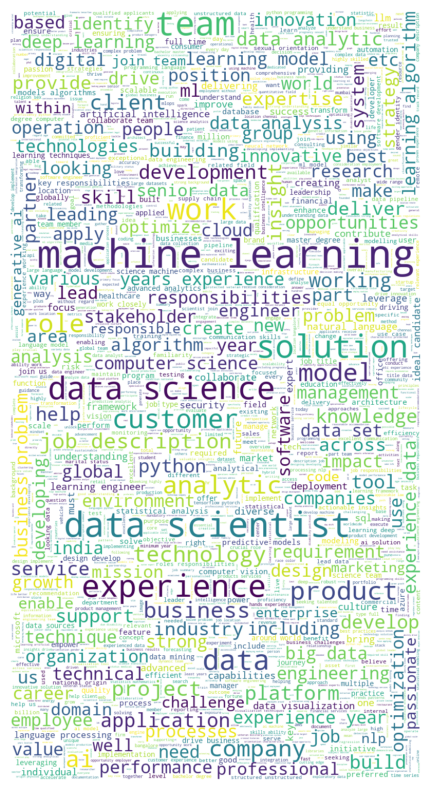

In [8]:
words = " ".join(df_copy['Job_Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()